In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report as cr, confusion_matrix as cm
from sklearn.neighbors import KNeighborsClassifier
from scipy.io import loadmat
from scipy.spatial.distance import pdist

In [3]:
path= "/Users/david/Documents/GitHub/Spring2020-Project3-group2/data/train_set/"
point_path = path+ "points/"
labels = pd.read_csv(path+"label.csv")

In [5]:
def point_load(point_path):
    point_list = []
    for i in sorted(os.listdir(point_path)):
        point_list.append(loadmat(os.path.join(point_path ,i)))
    
    fp_list = []
    for i in range(len(point_list)):
        if 'faceCoordinatesUnwarped' in point_list[i].keys():
            fp_list.append(point_list[i]['faceCoordinatesUnwarped'])
        else:
            fp_list.append(point_list[i]['faceCoordinates2'])
    feature = np.array([pdist(x) for x in fp_list])
    return feature

In [6]:
X = point_load(point_path)
y = labels["emotion_idx"]
ss = StandardScaler()
X = ss.fit_transform(X)

In [7]:
#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 123)

In [264]:
# parameter tuning using error rate
start = time.time()
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
final = time.time()- start

Text(0, 0.5, 'Error Rate')

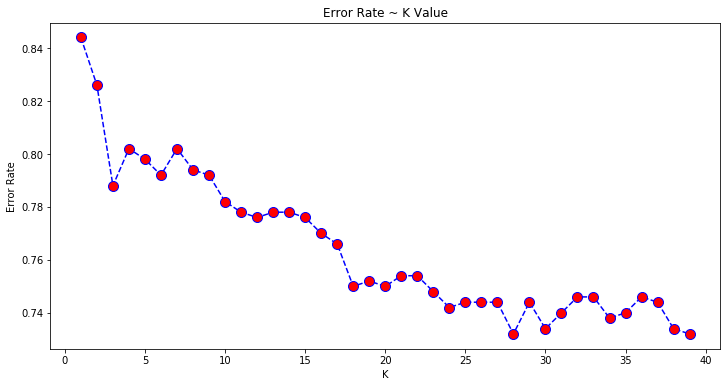

In [265]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate ~ K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [273]:
# train with best parameter (minimum error)

k_min = error_rate.index(min(error_rate))
knn_min = KNeighborsClassifier(n_neighbors=k_min, metric="euclidean")
knn_min.fit(X_train, y_train)

# prediction
y_pred = knn_min.predict(X_test)

# accuracy
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(cr(y_pred, y_test))

Accuracy score: 0.302
              precision    recall  f1-score   support

           1       0.56      0.15      0.23        68
           2       0.68      0.34      0.46        38
           3       0.32      0.26      0.29        31
           4       0.43      0.27      0.33        33
           5       0.50      0.41      0.45        22
           6       0.46      0.50      0.48        24
           7       0.35      0.37      0.36        19
           8       0.75      0.46      0.57        26
           9       0.16      0.33      0.22        12
          10       0.20      0.31      0.24        13
          11       0.29      0.54      0.38        13
          12       0.28      0.36      0.32        25
          13       0.08      0.09      0.09        22
          14       0.70      0.36      0.48        44
          15       0.23      0.28      0.25        18
          16       0.27      0.60      0.37        10
          17       0.12      0.18      0.14        17
     

In [235]:
# cross val

from sklearn.model_selection import cross_val_score as cvs
start_cv = time.time()
cv_scores = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    scores = cvs(knn, X_train, y_train, cv = 5, scoring="accuracy")
    cv_scores.append(scores.mean())
final_cv = time.time()- start_cv

Text(0, 0.5, 'CV Scores')

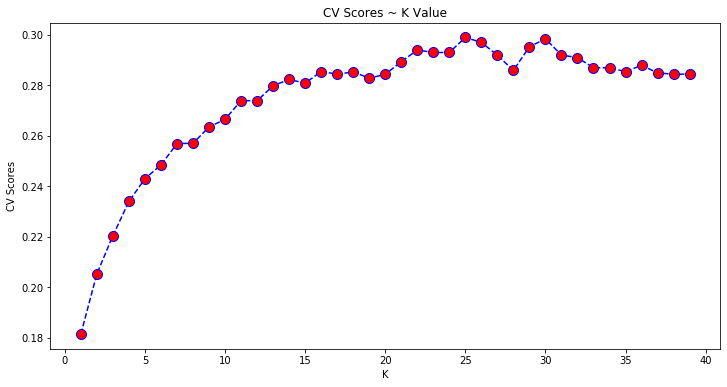

In [236]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),cv_scores,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('CV Scores ~ K Value')
plt.xlabel('K')
plt.ylabel('CV Scores')

In [237]:
from sklearn.metrics import accuracy_score

k_opt = cv_scores.index(max(cv_scores))
knn_opt = KNeighborsClassifier(n_neighbors=k_opt)
knn_opt.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [238]:
# train accuracy
train_pred_opt = knn_opt.predict(X_train)
print("train accuracy:")
print(accuracy_score(y_train, train_pred_opt))

train accuracy:
0.41


In [239]:
# test accuracy
test_pred_opt = knn_opt.predict(X_test)
print("test accuracy:")
print(accuracy_score(y_test, test_pred_opt))

test accuracy:
0.302


In [241]:
start_0 = time.time()
knn_final = KNeighborsClassifier(n_neighbors=k_opt)
knn_final.fit(X, y)
final_pred = knn_final.predict(X)
print("Time:", time.time()-start_0 )

In [275]:
print(accuracy_score(y, final_pred))

0.3728


In [274]:
from sklearn.externals import joblib
joblib.dump(knn_final,'knn_final.m')

['knn_final.m']